In [1]:
import pandas as pd

In [2]:
import re

In [3]:
data = pd.read_csv('Combined_News_DJIA.csv')

In [4]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

## About the dataset

This data set contains data of a top 25 reddit news headline of the day and the date of the news . The label columns shows wether the stock price has increased or decreased for at tha day.
Dow Jones Industrial Average (DJIA) is used  in stock data which is taken from https://finance.yahoo.com/ 

The label column is makrked:-

1 when DJIA Adj Close value rose or stayed as the same

0 when DJIA Adj Close value decreased

### Binary Classification Problem 

This is a binary classification problem , where we have labeled data  1 or 0, depending on wether stock price has increased or decreased . Features are the news headlines taken from reddit (top 25)

## Data Preprocessing

In [5]:
import matplotlib.pyplot as plt

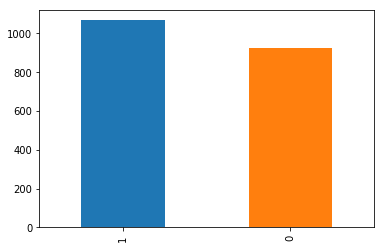

In [6]:
data['Label'].value_counts().plot.bar()

From the plot it is clear that the data is not inbalanced

In [7]:
data.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""


We need to merge all the headlines to a single sentence 

In [8]:
' '.join(str(x) for x in data.iloc[0,2:27])

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [9]:
data.shape

(1989, 27)

In [10]:
len(data)

1989

In [11]:
sentences = []
for i in range(len(data)):
    sentences.append( ' '.join(str(x) for x in data.iloc[i,2:27]) )

In [12]:
len(sentences)

1989

In [13]:
clean_headlines = []

In [14]:
for i in range(len(sentences)):
    clean_headlines.append(re.sub("b[(')]", '', sentences[i]))
    clean_headlines[i] = re.sub('b[(")]', '', clean_headlines[i])
    clean_headlines[i] = re.sub("\'", '', clean_headlines[i])
    clean_headlines[i] = re.sub('[^a-zA-Z]', ' ', clean_headlines[i])
    clean_headlines[i] = clean_headlines[i].lower()

In [15]:
len(clean_headlines)

1989

In [16]:
clean_headlines[0]

'georgia downs two russian warplanes as countries move to brink of war  breaking  musharraf to be impeached  russia today  columns of troops roll into south ossetia  footage from fighting  youtube  russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire afghan children raped with impunity  u n  official says   this is sick  a three year old was raped and they do nothing      russian tanks have entered south ossetia whilst georgia shoots down two russian jets  breaking  georgia invades south ossetia  russia warned it would intervene on sos side  the enemy combatent trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video  did the u s  prep georgia for war with russia  rice gives green light for israel to attack iran  s

In [17]:
import nltk

In [18]:
from nltk.corpus import stopwords

In [19]:
from nltk.stem import PorterStemmer

In [20]:
ps = PorterStemmer()

In [21]:
words = [ps.stem(word) for word in clean_headlines[0].split() if word not in stopwords.words('english')]
words = ' '.join(words)

In [22]:
words

'georgia down two russian warplan countri move brink war break musharraf impeach russia today column troop roll south ossetia footag fight youtub russian tank move toward capit south ossetia reportedli complet destroy georgian artilleri fire afghan children rape impun u n offici say sick three year old rape noth russian tank enter south ossetia whilst georgia shoot two russian jet break georgia invad south ossetia russia warn would interven so side enemi combat trial noth sham salim haman sentenc year kept longer anyway feel like georgian troop retreat osettain capit presum leav sever hundr peopl kill video u prep georgia war russia rice give green light israel attack iran say u veto isra militari op announc class action lawsuit behalf american public fbi russia georgia war nyt top stori open ceremoni olymp fuck disgrac yet proof declin journal china tell bush stay countri affair world war iii start today georgia invad south ossetia russia get involv nato absorb georgia unleash full sc

In [23]:
len(clean_headlines)

1989

In [24]:
corpus = []
for i in range(len(clean_headlines)):
    
    words = [ps.stem(word) for word in clean_headlines[i].split() if word not in stopwords.words('english')]
    words = ' '.join(words)
    corpus.append(words)
    print(i)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988


In [25]:
corpus[0]

'georgia down two russian warplan countri move brink war break musharraf impeach russia today column troop roll south ossetia footag fight youtub russian tank move toward capit south ossetia reportedli complet destroy georgian artilleri fire afghan children rape impun u n offici say sick three year old rape noth russian tank enter south ossetia whilst georgia shoot two russian jet break georgia invad south ossetia russia warn would interven so side enemi combat trial noth sham salim haman sentenc year kept longer anyway feel like georgian troop retreat osettain capit presum leav sever hundr peopl kill video u prep georgia war russia rice give green light israel attack iran say u veto isra militari op announc class action lawsuit behalf american public fbi russia georgia war nyt top stori open ceremoni olymp fuck disgrac yet proof declin journal china tell bush stay countri affair world war iii start today georgia invad south ossetia russia get involv nato absorb georgia unleash full sc

In [26]:
data['all_news'] = corpus

In [27]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,all_news
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",georgia down two russian warplan countri move ...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",wont america nato help us wont help us help ir...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",rememb ador year old sang open ceremoni fake r...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,u refus israel weapon attack iran report presi...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P..."

In [28]:
data['all_news'][0]

'georgia down two russian warplan countri move brink war break musharraf impeach russia today column troop roll south ossetia footag fight youtub russian tank move toward capit south ossetia reportedli complet destroy georgian artilleri fire afghan children rape impun u n offici say sick three year old rape noth russian tank enter south ossetia whilst georgia shoot two russian jet break georgia invad south ossetia russia warn would interven so side enemi combat trial noth sham salim haman sentenc year kept longer anyway feel like georgian troop retreat osettain capit presum leav sever hundr peopl kill video u prep georgia war russia rice give green light israel attack iran say u veto isra militari op announc class action lawsuit behalf american public fbi russia georgia war nyt top stori open ceremoni olymp fuck disgrac yet proof declin journal china tell bush stay countri affair world war iii start today georgia invad south ossetia russia get involv nato absorb georgia unleash full sc

In [29]:
data.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'all_news'],
      dtype='object')

In [30]:
cleaned_data = data[['Date', 'Label','all_news']]

In [31]:
cleaned_data.head()

,Date,Label,all_news
0,2008-08-08,0,georgia down two russian warplan countri move ...
1,2008-08-11,1,wont america nato help us wont help us help ir...
2,2008-08-12,0,rememb ador year old sang open ceremoni fake r...
3,2008-08-13,0,u refus israel weapon attack iran report presi...
4,2008-08-14,1,expert admit legalis drug war south osetia pic...


In [32]:
cleaned_data.shape

(1989, 3)

In [33]:
cleaned_data.tail()

,Date,Label,all_news
1984,2016-06-27,0,barclay rb share suspend trade tank pope say c...
1985,2016-06-28,1,scientist australia want save great barrier re...
1986,2016-06-29,1,explos airport istanbul yemeni former presid t...
1987,2016-06-30,1,jamaica propos marijuana dispens tourist airpo...
1988,2016-07-01,1,year old woman mexico citi final receiv birth ...


In [34]:
train_set = cleaned_data[cleaned_data['Date'] <  '2016-01-02']

In [35]:
train_set.head()

,Date,Label,all_news
0,2008-08-08,0,georgia down two russian warplan countri move ...
1,2008-08-11,1,wont america nato help us wont help us help ir...
2,2008-08-12,0,rememb ador year old sang open ceremoni fake r...
3,2008-08-13,0,u refus israel weapon attack iran report presi...
4,2008-08-14,1,expert admit legalis drug war south osetia pic...


In [36]:
train_set.tail()

,Date,Label,all_news
1858,2015-12-24,0,brazil declar emerg babi born brain damag poss...
1859,2015-12-28,0,germani recruit teacher teach german child ref...
1860,2015-12-29,1,pentagon thwart obama effort close guantanamo ...
1861,2015-12-30,0,tech compani face crimin charg notifi user uk ...
1862,2015-12-31,0,microsoft corp said wednesday begin warn user ...


In [37]:
test_set = cleaned_data[cleaned_data['Date'] > '2014-12-31']

In [38]:
test_set.head()

,Date,Label,all_news
1611,2015-01-02,1,case cancer result sheer bad luck rather unhea...
1612,2015-01-05,0,moscow gt beij high speed train reduc trip tim...
1613,2015-01-06,0,us oil fall barrel toyota give away fuel cell ...
1614,2015-01-07,1,shot fire french magazin hq bibi netanyahu cam...
1615,2015-01-08,1,new charli hebdo issu come next week hard suff...


In [39]:
X_train = train_set['all_news']

In [40]:
X_test = test_set['all_news']

In [41]:
y_test = test_set.Label

In [42]:
y_train = train_set.Label

In [43]:
y_train.value_counts()

1    995
0    868
Name: Label, dtype: int64

In [44]:
print(X_train.shape)
print(y_train.shape)

(1863,)
(1863,)


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
cv = TfidfVectorizer(max_features=4500)

In [85]:
X_train_t = cv.fit_transform(X_train).toarray()

In [86]:
X_train_t.shape

(1863, 4500)

In [87]:
y_train.shape

(1863,)

In [88]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
#model = RandomForestClassifier()
model1 = MultinomialNB()

In [91]:
#model.fit(X_train_t, y_train)
model1.fit(X_train_t, y_train)

MultinomialNB()

In [92]:
X_test_t = cv.transform(X_test).toarray()

In [93]:
X_test_t.shape

(378, 4500)

In [94]:
y_test.shape

(378,)

In [95]:
#y_pred = model.predict(X_test_t)
y_pred1 = model1.predict(X_test_t)

In [96]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [97]:
accuracy_score(y_test, y_pred1)

0.716931216931217

In [81]:
accuracy_score(y_test, y_pred1)

0.7248677248677249

In [82]:
confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [98]:
confusion_matrix(y_test, y_pred1)

array([[ 88,  98],
       [  9, 183]], dtype=int64)

In [100]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.47      0.62       186
           1       0.65      0.95      0.77       192

    accuracy                           0.72       378
   macro avg       0.78      0.71      0.70       378
weighted avg       0.78      0.72      0.70       378

